<a href="https://www.kaggle.com/theyazilimci/predict-charges-with-neural-network?scriptVersionId=83412632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Insurance 

In this notebook we'll try to build a Neural Network model to predict the charges of a person.
First we are going to analyse the data by using seaborn and matplotlib then we'll use tensorflow to built our Neural Network

**Columns**
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Library Used**

* Tensorflow
* Pandas
* Numpy
* Seaborn
* Matplotlib

# Data Import & Information

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There aren't Null Value in our Dataset which is a good things for build a model 

#### Divise Categorical data and Numerical data

# Plot

In [6]:
cols = df.columns

num_cols = df._get_numeric_data().columns
num_cols

categorical_col = list(set(cols) - set(num_cols))
categorical_col,num_cols

(['region', 'smoker', 'sex'],
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

<AxesSubplot:xlabel='sex', ylabel='charges'>

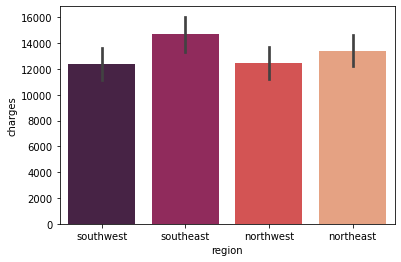

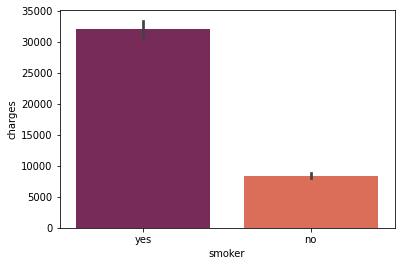

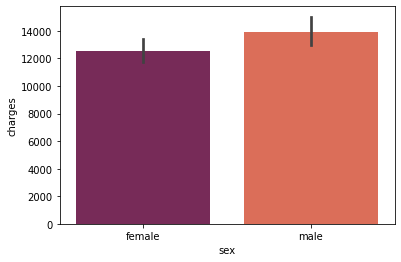

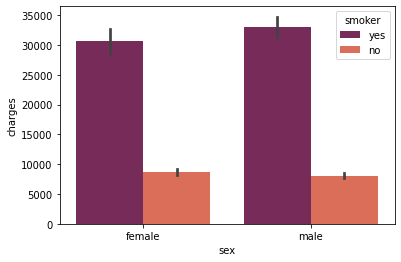

In [7]:
for i in categorical_col:
    plt.figure()
    sns.barplot(x=i,y='charges',data=df,palette="rocket")
plt.figure()
sns.barplot(x='sex',y='charges',hue='smoker',data=df,palette='rocket')

#### Observation: We can see than smoking have a real impact in our charges,male have more charges than female and we can observe than the number of male than smoke is greater than female. The regions which have the most charges is the southeast 


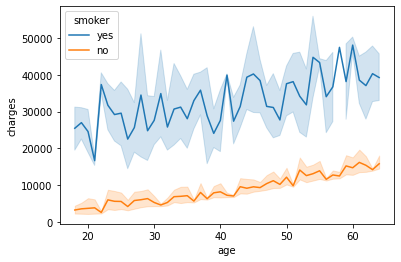

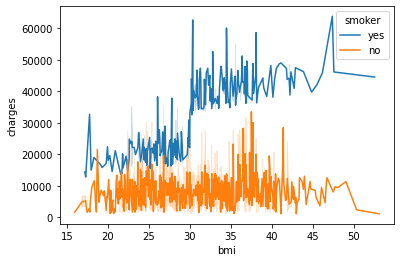

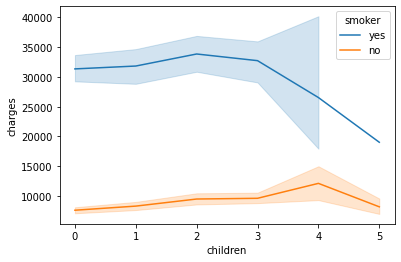

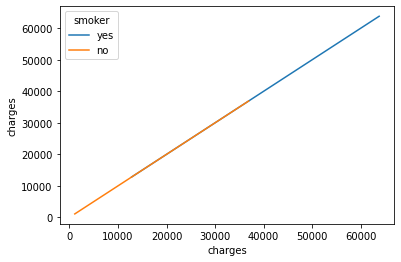

In [8]:
for i in num_cols:
    plt.figure()
    sns.lineplot(data=df, x=i, y="charges",hue='smoker')

<AxesSubplot:>

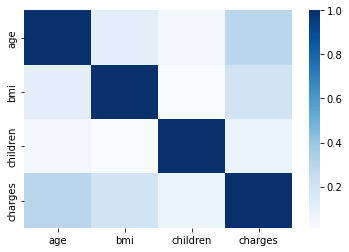

In [9]:
sns.heatmap(df.corr(),cmap="Blues")

#### Observation: We observe that older person have the most charges, person with more childres have less charges than person with one children but we can see here too that smoker pay more charges than a non-smoker person

# Build Model

#### Preprocess the data, we scale the data between 0 and 1 and transform categorical data to numerical data by using OneHotEncoder

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#  Create a columns transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
)

X = df.drop("charges",axis=1)
y = df["charges"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

#### Neural Network Model

In [11]:
insurance = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
])

insurance.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])

history = insurance.fit(x_train_normal,
                        y_train,
                        epochs=200)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.7549 - mae: 13344.7549
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13343.2021 - mae: 13343.2021
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13340.4727 - mae: 13340.4727
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13335.7139 - mae: 13335.7139
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13327.8877 - mae: 13327.8877
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13315.8848 - mae: 13315.8848
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13298.6064 - mae: 13298.6064
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 13275.0605 - mae: 13275.0605
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 13244.1973 - mae: 13244.1973
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 13205.00

# Model Evaluation

Text(0.5, 0, 'epochs')

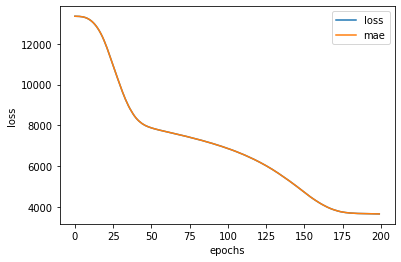

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
insurance.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3483.6174 - mae: 3483.6174


[3483.617431640625, 3483.617431640625]

In [14]:
y_pred = insurance.predict(x_test_normal)
y_pred = tf.squeeze(y_pred)
y_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 9302.819,  6083.121, 32629.072,  9245.194, 20552.49 ],
      dtype=float32)>

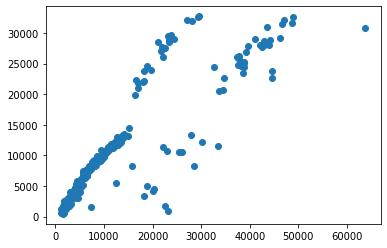

In [15]:
plt.scatter(y_test,y_pred)

# Model Saving 

In [16]:
insurance.save("insurance_model_HDF5_format.h5")  